In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df = pd.read_csv('dataset/mnist_test.csv')

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = np.array(df)

# Splitting data for NN dev and Training

In [5]:
m, n = df.shape
df_dev = df[0: 1000]
df_train = df[1000: m]
data = df_dev.T
y = data[0]
X = data[1: ]
y_train = df_train.T[0]
X_train = df_train.T[1: ]
X_train = X_train / 255

# Functions for NN dev

In [6]:
def one_hot(y, num_classes=10):
    one_hot_matrix = np.zeros((y.size, num_classes))
    one_hot_matrix[np.arange(y.size), y] = 1
    return one_hot_matrix.T

In [7]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

In [8]:
def reLU(z):
    return np.maximum(0, z)

def der_reLU(z):
    return (z > 0)

In [9]:
def softMax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [10]:
def forward_prop(X, w1, b1, w2, b2):
    z1 = np.dot(w1, X) + b1
    a1 = reLU(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softMax(z2)
    return z1, a1, z2, a2

In [11]:
def back_prop(X, y, z1, a1, w2, a2):
    dz2 = a2 - one_hot(y)
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2)
    dz1 = np.dot(w2.T, dz2) * der_reLU(z1)
    dw1 = (1 / m) * np.dot(dz1, X.T)
    db1 = (1 / m) * np.sum(dz1)
    return dw1, db1, dw2, db2

In [12]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [13]:
def pred(a):
    return np.argmax(a, 0)

In [14]:
def gradient_descent(X, y, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(X, w1, b1, w2, b2)
        dw1, db1, dw2, db2 = back_prop(X, y, z1, a1, w2, a2)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy:", np.mean(y == pred(a2)))
    return w1, b1, w2, b2

# Running NN

In [15]:
w1, b1, w2, b2 = gradient_descent(X_train, y_train, 1000, 0.1)

Iteration:  0
Accuracy: 0.09666666666666666
Iteration:  50
Accuracy: 0.3422222222222222
Iteration:  100
Accuracy: 0.5044444444444445
Iteration:  150
Accuracy: 0.6685555555555556
Iteration:  200
Accuracy: 0.7336666666666667
Iteration:  250
Accuracy: 0.7682222222222223
Iteration:  300
Accuracy: 0.7895555555555556
Iteration:  350
Accuracy: 0.8088888888888889
Iteration:  400
Accuracy: 0.8208888888888889
Iteration:  450
Accuracy: 0.8307777777777777
Iteration:  500
Accuracy: 0.8403333333333334
Iteration:  550
Accuracy: 0.8471111111111111
Iteration:  600
Accuracy: 0.8528888888888889
Iteration:  650
Accuracy: 0.8582222222222222
Iteration:  700
Accuracy: 0.8641111111111112
Iteration:  750
Accuracy: 0.8674444444444445
Iteration:  800
Accuracy: 0.8712222222222222
Iteration:  850
Accuracy: 0.8756666666666667
Iteration:  900
Accuracy: 0.8782222222222222
Iteration:  950
Accuracy: 0.8802222222222222


# Testing

In [16]:
import cv2

In [17]:
def preprocess_img(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = 255 - img
    img = img / 255.0
    img = img.reshape(784, 1)
    return img

Prediction by model: [2]


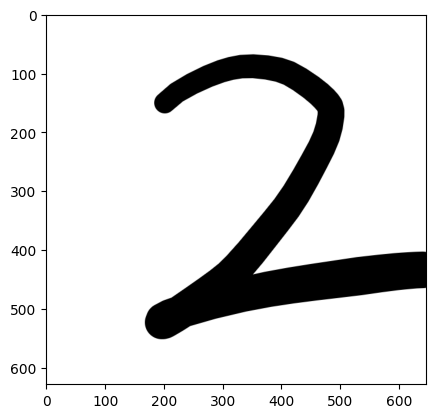

In [54]:
import matplotlib.image as mpimg
path = 'dataset/two2.png'
img = mpimg.imread(path)
X_test = preprocess_img(path)
z1, a1, z2, a2 = forward_prop(X_test, w1, b1, w2, b2)
plt.imshow(img)
print("Prediction by model:", pred(a2))
